In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

from WiSARD import WiSARD
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [2]:
data = []
for file in df:
    for i in range(df[file].shape[0]):
        if type(df[file].iloc[i]['title']) is str:
            data.append(df[file].iloc[i]['title'])
        if type(df[file].iloc[i]['content']) is str:
            data.append(df[file].iloc[i]['content'])

In [8]:
X = []
y = []
for file in df:
    for i in range(2000):
        if type(df[file].iloc[i]['content']) is str:
            X.append(df[file].iloc[i]['content'])
            y.append(file)
            
X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        if type(df[file].iloc[i]['content']) is str:
            X_test.append(df[file].iloc[i]['content'])
            y_test.append(file)
            

Vocabulary size: 832


C:\Users\317005\Projetos\mab786\experiments\WiSARD.py:133: RuntimeWarning: invalid value encountered in true_divide
  result = np.array(result_partial)/result_sum


Confusion matrix, without normalization
[[371   8  16  18  13  74]
 [  0 451  30   8   4   7]
 [  2  21 409   8  14  46]
 [ 20  48  90 248  27  67]
 [  4   5  18   5 439  29]
 [  4   4  23   8   9 452]]


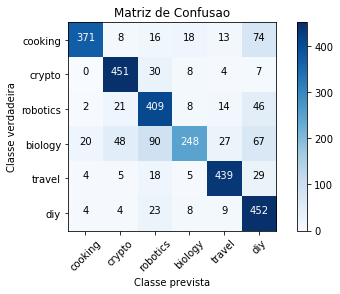

Accuracy: 0.79


In [25]:
sv = CountVectorizer(binary=True, max_df=0.025, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 488
Confusion matrix, without normalization
[[238  20  69   9  29 135]
 [  1 434  35   8   5  17]
 [  9  62 309   9  24  87]
 [ 21  78 119 140  51  91]
 [  7  22  48  10 360  53]
 [ 11   7  35   9  15 423]]


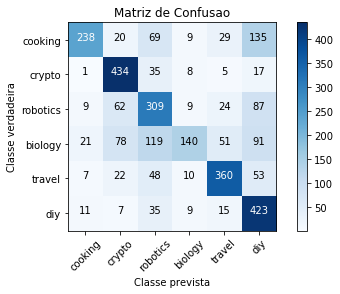

Accuracy: 0.634666666667


In [18]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=0.01)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 980
Confusion matrix, without normalization
[[299  24  44   8  20 105]
 [  2 455  29   4   2   8]
 [  4  34 407   3  11  41]
 [  9  76 130 179  26  80]
 [  1  11  26   5 429  28]
 [  5   8  26   3   7 451]]


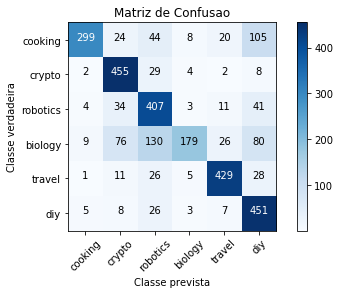

Accuracy: 0.74


In [26]:
sv = CountVectorizer(binary=True, max_df=0.9, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 7277
Confusion matrix, without normalization
[[403  16  19   3   9  50]
 [  0 485  13   0   1   1]
 [  0   5 482   2   3   8]
 [  5  24  49 367  12  43]
 [  1   6  13   0 472   8]
 [  1   3  18   3   1 474]]


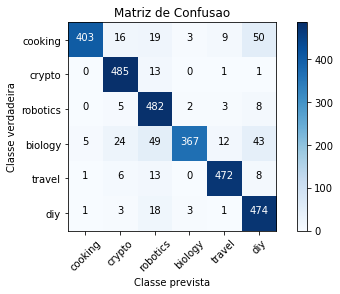

Accuracy: 0.894333333333


In [30]:
sv = CountVectorizer(binary=True, max_df=0.3, min_df=50)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 9541
Confusion matrix, without normalization
[[400  19  25   1   7  48]
 [  0 482  16   0   1   1]
 [  0   6 479   1   1  13]
 [  5  28  56 366  12  33]
 [  1   7  17   0 465  10]
 [  1   4  21   4   2 468]]


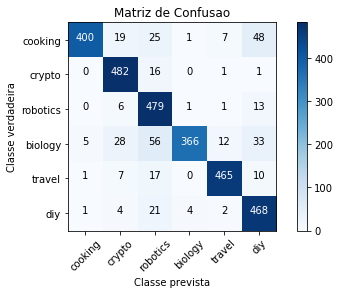

Accuracy: 0.886666666667


In [31]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=30)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 11733
Confusion matrix, without normalization
[[398  16  20   2   8  56]
 [  0 485   9   1   2   3]
 [  0   4 482   1   2  11]
 [  2  30  54 356  15  43]
 [  1   8  15   0 466  10]
 [  1   5  22   4   2 466]]


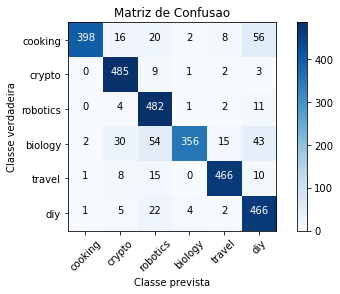

Accuracy: 0.884333333333


In [32]:
sv = CountVectorizer(binary=True, max_df=0.5, min_df=20)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 7277
Confusion matrix, without normalization
[[405  15  23   3   7  47]
 [  0 484  14   0   1   1]
 [  0   5 482   2   1  10]
 [  4  28  57 360  15  36]
 [  0   5  18   1 466  10]
 [  1   5  19   3   3 469]]


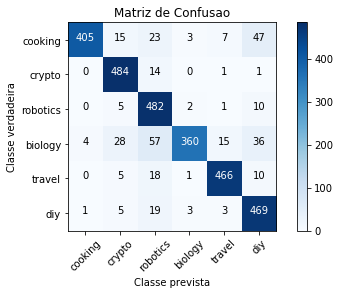

Accuracy: 0.888666666667


In [33]:
sv = CountVectorizer(binary=True, max_df=0.3, min_df=50)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(2, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 7277
Confusion matrix, without normalization
[[399  10  22   2   8  59]
 [  0 482  13   1   3   1]
 [  1   8 478   1   1  11]
 [  3  23  51 370  17  36]
 [  0   3  20   0 470   7]
 [  1   5  20   4   2 468]]


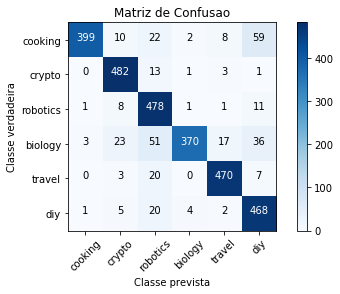

Accuracy: 0.889


In [34]:
sv = CountVectorizer(binary=True, max_df=0.3, min_df=50)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

w = WiSARD(16, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)
w.fit(X_.toarray(), y)
result = w.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))